[20220814]

# 1. Exploration

This is timeseries exploration

*Base Level + Trend + Seasonality + Error*

## Goal
Find patterns on timeseries

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Basic Summary
        [ ] Data Preparations / Feature Engineering
            [ ] Missing Value
            [ ] Outliers Handling
            [ ] Categorical Handling
        [ ] Timeseries obervation
            [ ] Autocorrelation
            [ ] Trend
            [ ] Seasonality
            [ ] Stationarity (Dickey Fuller)
        
## Source
* https://rpubs.com/ryankelly/tsa5
* https://www.machinelearningplus.com/time-series/time-series-analysis-python/, https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import joblib

sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 
from ramal import jampi

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_0'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
df = pd.read_csv(PATH_INTERIM + 'daily-min-temp2_iter0.csv')

In [4]:
df.head()

,Date,Temp,is_future
0,1981-01-01,20.7,False
1,1981-01-02,17.9,False
2,1981-01-03,18.8,False
3,1981-01-04,14.6,False
4,1981-01-05,15.8,False


## Data Prep

In [5]:
ts = jampi(data = df, time_col = 'Date', data_col = 'Temp', start_test = '1990-01-01',freq = 'w')

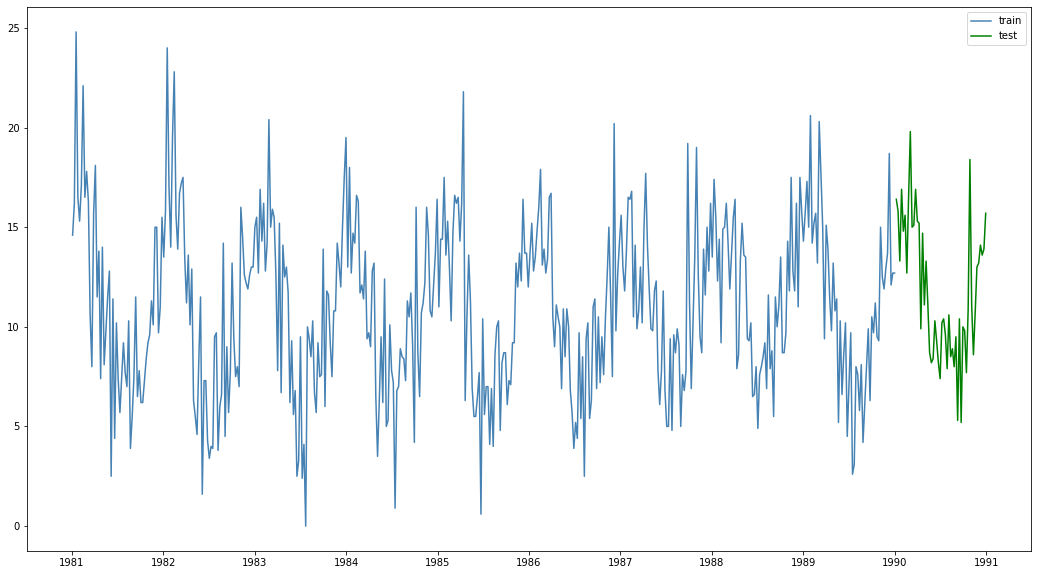

In [6]:
# ts.plot()
ts.plot(test = True)

## Exploration

In [28]:
## just look into last six months (because there is a seasonal still in trend)
df2 = df[df.Date>='1986-01-01']
ts2 = jampi(data = df2, time_col = 'Date', data_col = 'Temp', start_test = '1990-08-01', freq = 'W')
## handling null
ts2.interpolate()

../../src/ramal.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[time_col] = pd.to_datetime(data[time_col])


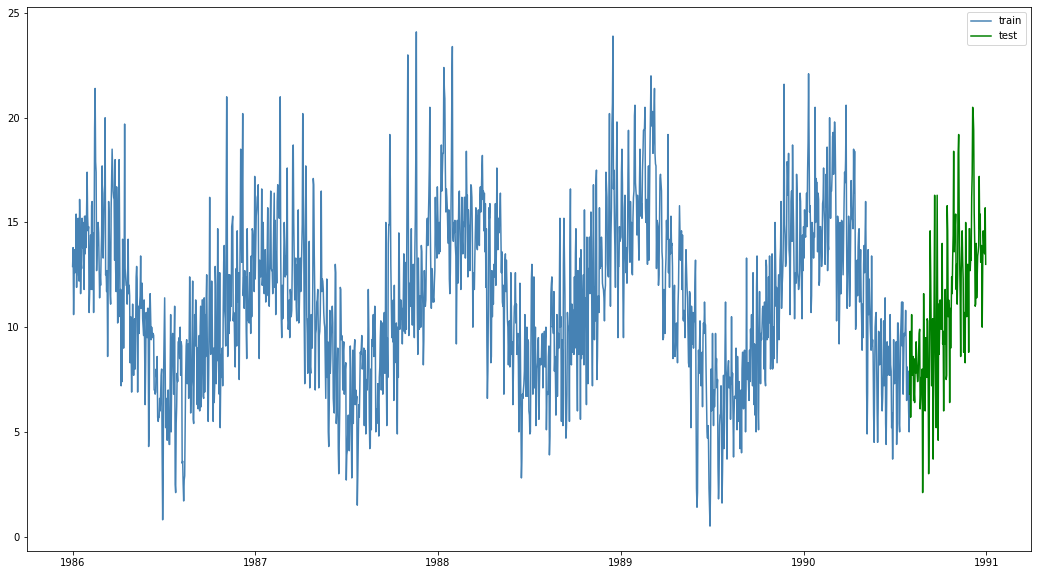

In [27]:
ts2.plot(test = True)

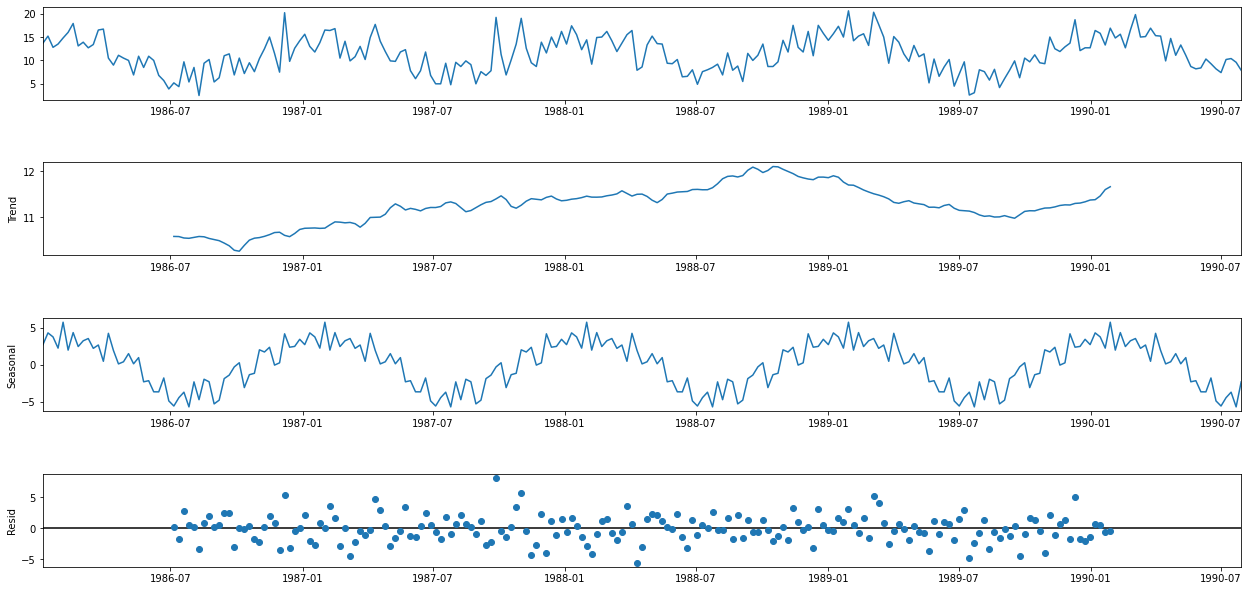

In [20]:
## decompose
ts2.decompose()
fig = ts2.decomp.plot()
fig.set_size_inches((20, 9))

In [21]:
ts2.adf_test()

ADF Statistic: -5.74855771402019
p-value: 6.041025722967705e-07
Stationary


/usr/local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


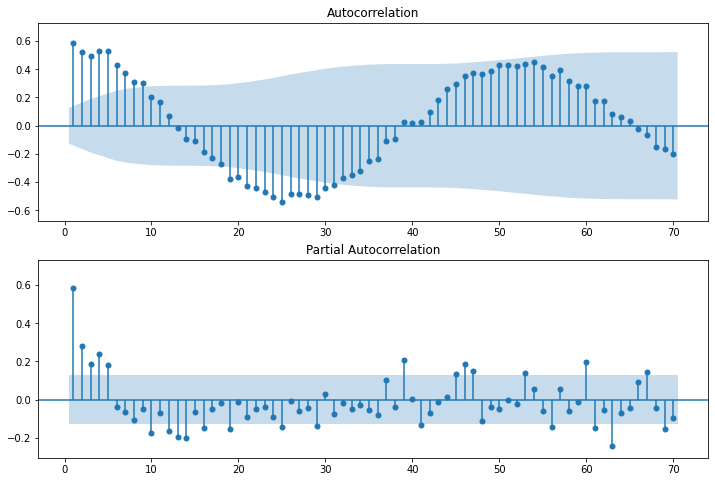

In [22]:
## not slowly decaying
ts2.acf_pacf(logs = 70)

/usr/local/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


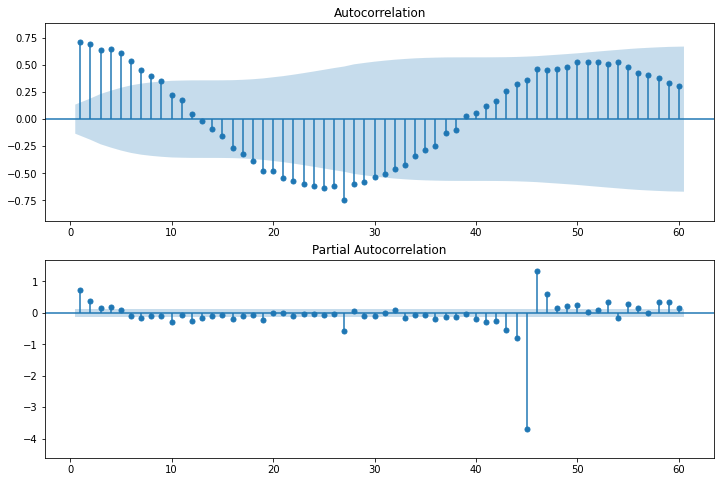

In [23]:
## not slowly decaying
ts2.seasonal_factor = 27
ts2.acf_pacf(logs = 60, differencing=0, seasonal_differencing=1)

In [24]:
ts2.auto_arma_param(differencing = 1)

MA(1)
AR(4)
with  1 differencing


In [25]:
joblib.dump(ts2,PATH_MODEL+'ramal_1.pkl')

['../../artifacts/iteration_0/ramal_1.pkl']